# Binary valued data, i.e. $\mathbb{S}_0$, on line-graph, i.e. $\mathbb{S}_0$-signal

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from scipy.interpolate import CubicSpline
from scipy import optimize
import condat_tv

import imp

In [3]:
import dots

In [4]:
imp.reload(dots)

<module 'dots' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/dots.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Gaussian

standard deviation : sigma = 0.9899494936611666


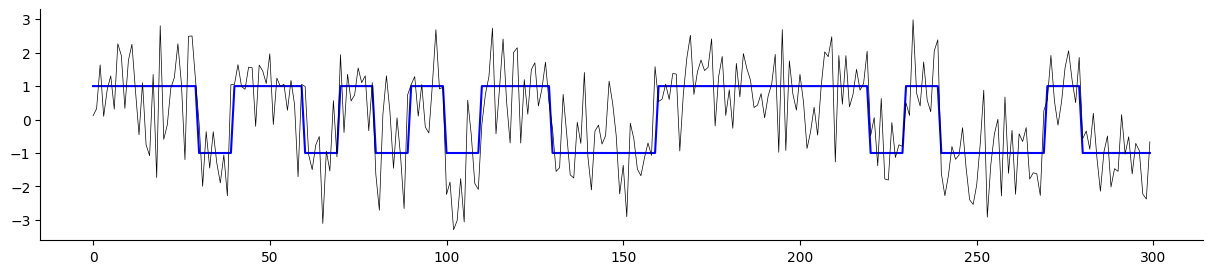

In [43]:
dd, dd_0 = dots.barcode_generator((np.sqrt(2)*0.7)**2, 31, 10)

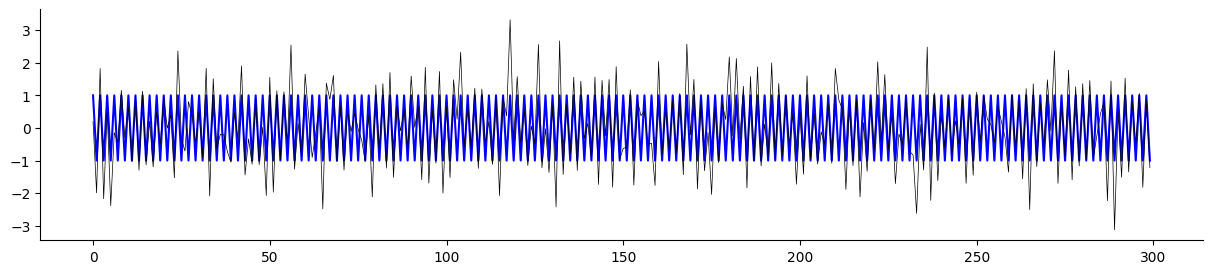

In [6]:
cdd, cdd_0, cddc = dots.gen_sig_counterex(300,(np.sqrt(2)*0.5)**2)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ANISO-TV : solving the complex-valued S_1-model proposed by Condat ...
- GME-TV : solving the complex-valued S_1-model proposed by Condat ...
- TV : solving the state-of-the-art unconstrained TV problem 

In [49]:
r, q_aniso_tv, x1r, x2r = dots.AnisotropicTV(1/2*(1+dd), 1/2*(1+dd_0), 1.6)

In [59]:
q_gme_tv = dots.GME_TV(dd, dd_0, 2.4, 3000)

iter. 	| funv-value 		| RMSE 		| error
-----------------------------------------------------------------
0  	|  324.5571350209815  	|    5.34e+01  	|    1.40e+01
50  	|  344.0986603957162  	|    9.65e+01  	|    6.30e-03
100  	|  344.36667734760704  	|    9.70e+01  	|    1.36e-03
150  	|  344.4326632438979  	|    9.71e+01  	|    3.54e-04
200  	|  344.4497630070514  	|    9.72e+01  	|    9.32e-05
250  	|  344.454252856748  	|    9.72e+01  	|    2.46e-05
285  	|  344.4552103035665  	|    9.72e+01  	|    9.93e-06


In [12]:
cq_tv_box, cqz = dots.ADMM_TV_BOX(cddc, cdd_0, mu=0.9, rho=0.1, iter=100)

iter. 	| funv-value 		| RMSE 		| error
-----------------------------------------------------------------
0  	|  721.8  	|    3.48e+02  	|    8.49e+00
1  	|  674.6  	|    3.00e+02  	|    5.66e+00
2  	|  672.8  	|    2.98e+02  	|    1.41e+00
3  	|  672.8  	|    2.98e+02  	|    0.00e+00


In [53]:
q_tv_box, qz = dots.ADMM_TV_BOX(dd, dd_0, mu=2, rho=0.1, iter=100)

iter. 	| funv-value 		| RMSE 		| error
-----------------------------------------------------------------
0  	|  17357.393556494393  	|    1.73e+04  	|    1.47e+02
1  	|  704.5344735786084  	|    3.48e+02  	|    1.15e+02
2  	|  341.27053480009386  	|    2.40e+01  	|    1.73e+01
3  	|  341.27053480009425  	|    2.40e+01  	|    9.24e-14


In [54]:
q_condat_tv = condat_tv.tv_denoise(dd, 0.1)

In [55]:
q = np.sign(dd)

In [56]:
q_gme_tv2 = np.sign(q_gme_tv)

In [57]:
print(' \t\t| fast-Condat-TV \t| SIGN \t\t| fast-ADMM-TV \t| ANISO-TV \t| fast-GME-TV \t| proj-fast-GME-TV')

print('-----------------------------------------------------------------------------------------------------------')
print('RMSE \t\t|',  "%10.2e"%np.sqrt(np.sum((q_condat_tv - dd_0)**2)/300), ' \t\t|', "%10.2e"%np.sqrt(np.sum((q - dd_0)**2)/300), ' \t|', "%10.2e"%np.sqrt(np.sum((q_tv_box - dd_0)**2)/300),' \t|', "%10.2e"%np.sqrt(np.sum((2*(q_aniso_tv-0.5) - dd_0)**2)/300),' \t|', "%10.2e"%np.sqrt(np.sum((q_gme_tv - dd_0)**2)/300), ' \t|', "%10.2e"%np.sqrt(np.sum((q_gme_tv2 - dd_0)**2)/300))
print('MAE  \t\t|',  "%10.2e"%np.sum(np.abs(q_condat_tv - dd_0)/300), ' \t\t|',  "%10.2e"%np.sum(np.abs(q - dd_0)/300), ' \t|', "%10.2e"%np.sum(np.abs(q_tv_box - dd_0)/300), ' \t|',"%10.2e"%np.sum(np.abs(2*(q_aniso_tv-0.5) - dd_0)/300), ' \t|', "%10.2e"%np.sum(np.abs(q_gme_tv - dd_0)/300), ' \t|', "%10.2e"%np.sum(np.abs(q_gme_tv2 - dd_0)/300))
print('MIoU \t\t|',  "%10.2e"%np.nanmean(dots.MIoU_cut(dd_0, q_condat_tv)), ' \t\t|',  "%10.2e"%np.nanmean(dots.MIoU_cut(dd_0, q)), ' \t|', "%10.2e"%np.nanmean(dots.MIoU_cut(dd_0, q_tv_box)), ' \t|',"%10.2e"%np.nanmean(dots.MIoU_cut(dd_0, 2*(q_aniso_tv-0.5))), ' \t|', "%10.2e"%np.nanmean(dots.MIoU_cut(dd_0, q_gme_tv)), ' \t|', "%10.2e"%np.nanmean(dots.MIoU_cut(dd_0, q_gme_tv2)))

 		| fast-Condat-TV 	| SIGN 		| fast-ADMM-TV 	| ANISO-TV 	| fast-GME-TV 	| proj-fast-GME-TV
-----------------------------------------------------------------------------------------------------------
RMSE 		|   8.96e-01  		|   8.16e-01  	|   2.83e-01  	|   5.03e-01  	|   6.51e-01  	|   5.42e-01
MAE  		|   7.06e-01  		|   3.33e-01  	|   4.00e-02  	|   1.27e-01  	|   4.49e-01  	|   1.47e-01
MIoU 		|   6.97e-05  		|   7.12e-01  	|   9.60e-01  	|   8.79e-01  	|   0.00e+00  	|   8.61e-01


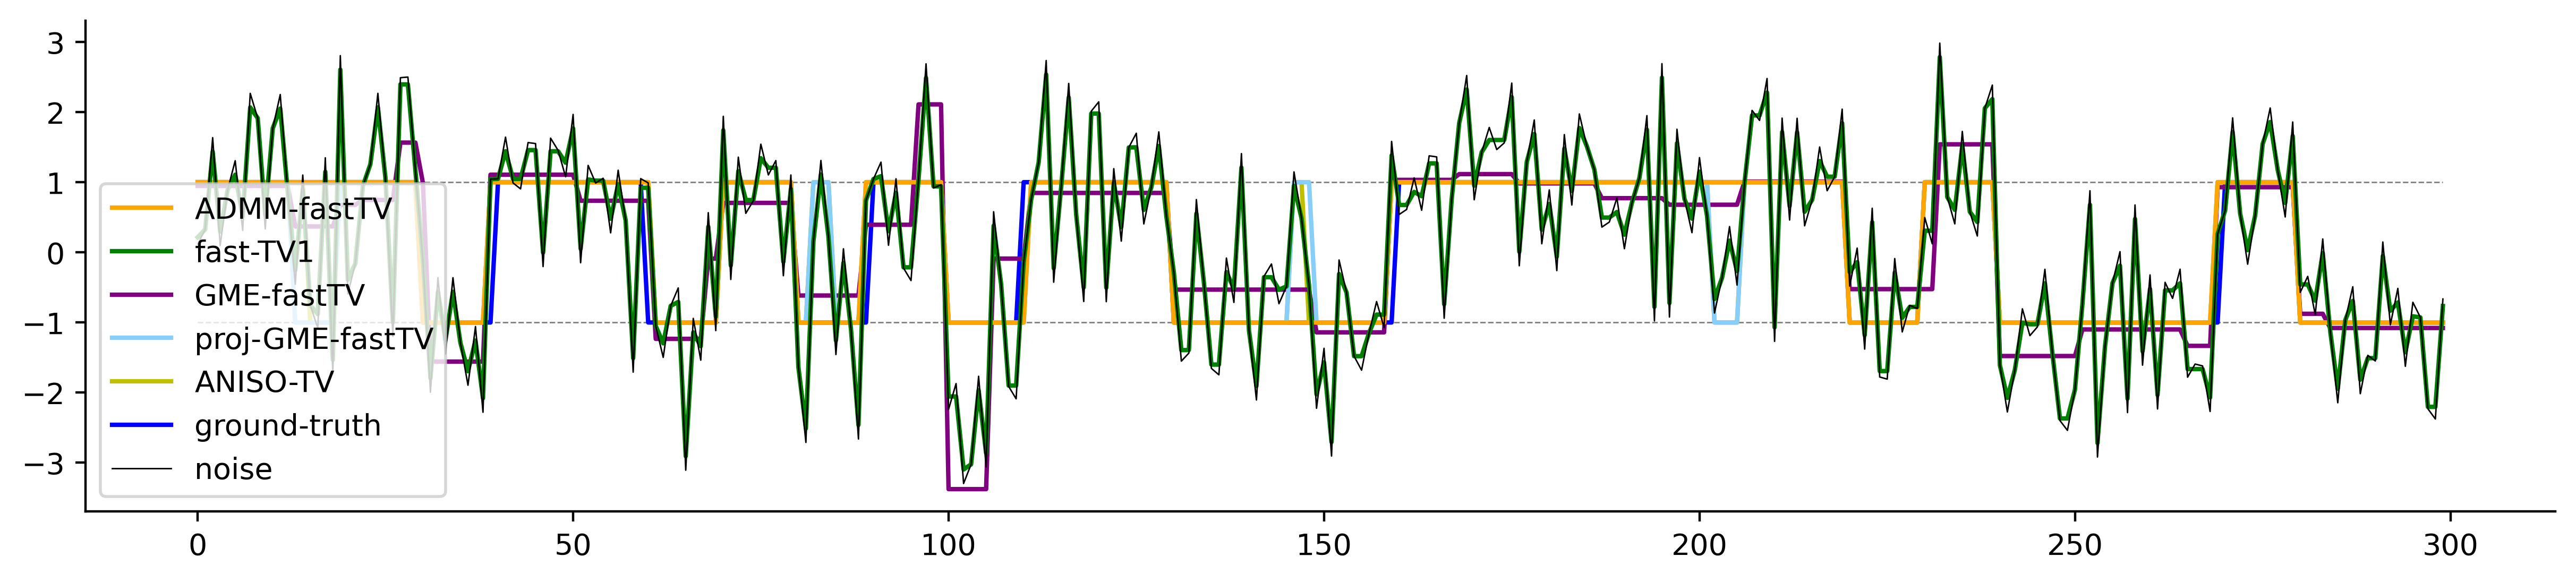

In [60]:
plt.figure(1,figsize=(15,3), dpi=400)
plt.plot(np.ones(300), '--', color='gray', linewidth=0.5)
plt.plot(-np.ones(300), '--', color='gray', linewidth=0.5)
p5, = plt.plot(dd_0, 'b')
p4, = plt.plot((q_aniso_tv-0.5)*2, 'y')
#plt.plot(q_tv, 'r')
p3, = plt.plot(q_gme_tv, 'purple')
p32, = plt.plot(q_gme_tv2, 'lightskyblue')
p1, = plt.plot(q_tv_box, 'orange')
p2, = plt.plot(q_condat_tv, 'g')
#p11, = plt.plot(q_tv_approx, 'peachpuff')
p6, = plt.plot(dd, 'k', linewidth=0.5)
plt.legend([p1, p2, p3, p32, p4, p5, p6], ['ADMM-fastTV', 'fast-TV1', 'GME-fastTV', 'proj-GME-fastTV', 'ANISO-TV', 'ground-truth','noise'])
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
#plt.savefig('0D_case_example.png',dpi=400)

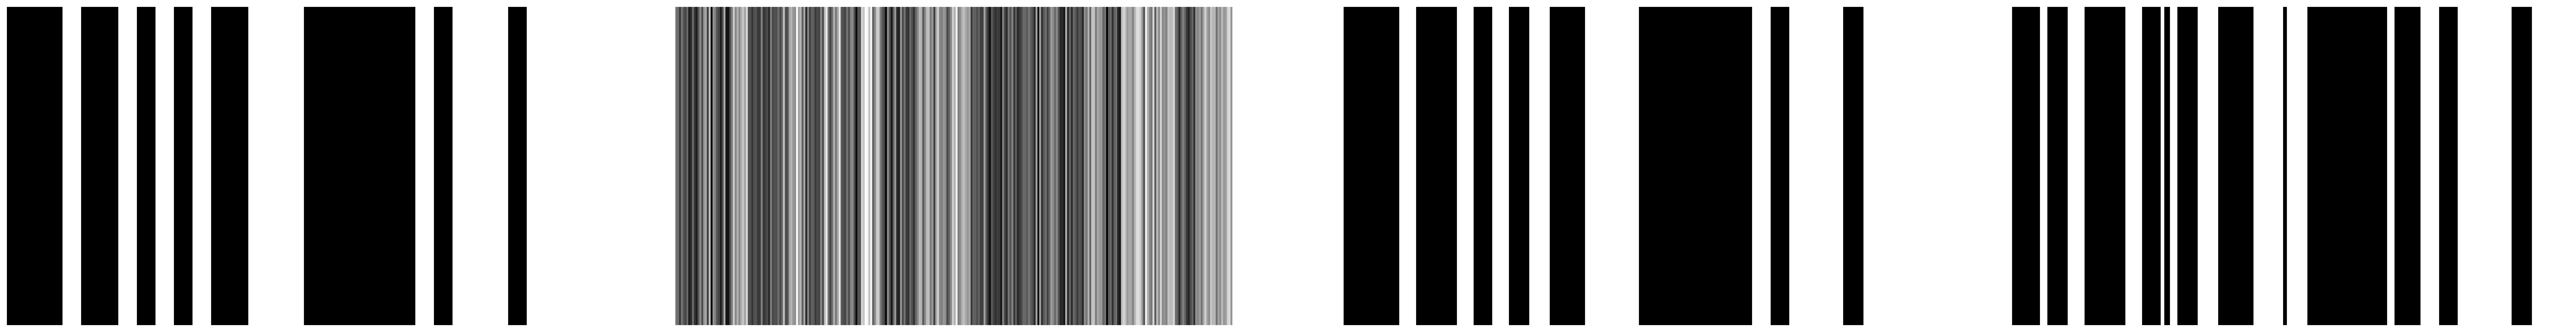

In [51]:
dots.bar_code_plt(dd_0, dd, q_tv_box, q_aniso_tv, 6)